In [245]:
import pandas as pd
import numpy as np
from scipy.stats import pointbiserialr, chi2_contingency
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [246]:
# Type your Loan.csv path
file_path = 'Loan.csv'

# Loading Data
df = pd.read_csv(file_path)
print(df.describe())
df.head()

                Age   AnnualIncome   CreditScore    Experience     LoanAmount  \
count  20000.000000   20000.000000  20000.000000  20000.000000   20000.000000   
mean      39.752600   59161.473550    571.612400     17.522750   24882.867800   
std       11.622713   40350.845168     50.997358     11.316836   13427.421217   
min       18.000000   15000.000000    343.000000      0.000000    3674.000000   
25%       32.000000   31679.000000    540.000000      9.000000   15575.000000   
50%       40.000000   48566.000000    578.000000     17.000000   21914.500000   
75%       48.000000   74391.000000    609.000000     25.000000   30835.000000   
max       80.000000  485341.000000    712.000000     61.000000  184732.000000   

       LoanDuration  NumberOfDependents  MonthlyDebtPayments  \
count  20000.000000        20000.000000         20000.000000   
mean      54.057000            1.517300           454.292700   
std       24.664857            1.386325           240.507609   
min       12.0

ApplicationDate  Age  AnnualIncome  CreditScore EmploymentStatus  \
0      2018-01-01   45         39948          617         Employed   
1      2018-01-02   38         39709          628         Employed   
2      2018-01-03   47         40724          570         Employed   
3      2018-01-04   58         69084          545         Employed   
4      2018-01-05   37        103264          594         Employed   

  EducationLevel  Experience  LoanAmount  LoanDuration MaritalStatus  ...  \
0         Master          22       13152            48       Married  ...   
1      Associate          15       26045            48        Single  ...   
2       Bachelor          26       17627            36       Married  ...   
3    High School          34       37898            96        Single  ...   
4      Associate          17        9184            36       Married  ...   

   MonthlyIncome UtilityBillsPaymentHistory  JobTenure  NetWorth  \
0    3329.000000                   0.724972         11    126928   
1    3309.083333                   0.935132          3     43609   
2    3393.666667                   0.872241          6      5205   
3    5757.000000                   0.896155          5     99452   
4    8605.333333                   0.941369          5    227019   

   BaseInterestRate  InterestRate  MonthlyLoanPayment  TotalDebtToIncomeRatio  \
0          0.199652      0.227590          419.805992                0.181077   
1          0.207045      0.201077          794.054238                0.389852   
2          0.217627      0.212548          666.406688                0.462157   
3          0.300398      0.300911         1047.506980                0.313098   
4          0.197184      0.175990          330.179140                0.070210   

  LoanApproved  RiskScore  
0            0       49.0  
1            0       52.0  
2            0       52.0  
3            0       54.0  
4            1       36.0  

[5 rows x 36 columns]

In [247]:
# UtilityBillsPaymentHistory removed
categorical_columns = [
    'EmploymentStatus',
    'EducationLevel',
    'MaritalStatus',
    'HomeOwnershipStatus',
    'BankruptcyHistory',
    'LoanPurpose',
    'PaymentHistory',
    'LoanApproved'
]

numeric_columns = [
    'Age',
    'AnnualIncome',
    'CreditScore',
    'Experience',
    'LoanAmount',
    'LoanDuration',
    'NumberOfDependents',
    'MonthlyDebtPayments',
    'CreditCardUtilizationRate',
    'NumberOfOpenCreditLines',
    'NumberOfCreditInquiries',
    'DebtToIncomeRatio',
    'PreviousLoanDefaults',
    'LengthOfCreditHistory',
    'SavingsAccountBalance',
    'CheckingAccountBalance',
    'TotalAssets',
    'TotalLiabilities',
    'MonthlyIncome',
    'JobTenure',
    'NetWorth',
    'BaseInterestRate',
    'InterestRate',
    'MonthlyLoanPayment',
    'TotalDebtToIncomeRatio',
    'RiskScore'
]

In [248]:
# Change column types where applicable
# UtilityBillsPaymentHistory removed
# Check and remove 'UtilityBillsPaymentHistory' column if it exists

if 'UtilityBillsPaymentHistory' in df.columns:
    df = df.drop('UtilityBillsPaymentHistory', axis=1)

for col in categorical_columns:
    df[col] = df[col].astype('category')

for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Convert 'ApplicationDate' to datetime
df['ApplicationDate'] = pd.to_datetime(df['ApplicationDate'], errors='coerce')

# Compute the summary statistics for numeric columns
summary = df.head()

# Print the summary
print(summary)

print('\n min, max, mean only')
Min_Max_Mean=df.describe(include=[float, int]).loc[["min", "max", "mean"]]
print(Min_Max_Mean)


  ApplicationDate  Age  AnnualIncome  CreditScore EmploymentStatus  \
0      2018-01-01   45         39948          617         Employed   
1      2018-01-02   38         39709          628         Employed   
2      2018-01-03   47         40724          570         Employed   
3      2018-01-04   58         69084          545         Employed   
4      2018-01-05   37        103264          594         Employed   

  EducationLevel  Experience  LoanAmount  LoanDuration MaritalStatus  ...  \
0         Master          22       13152            48       Married  ...   
1      Associate          15       26045            48        Single  ...   
2       Bachelor          26       17627            36       Married  ...   
3    High School          34       37898            96        Single  ...   
4      Associate          17        9184            36       Married  ...   

   TotalLiabilities MonthlyIncome  JobTenure  NetWorth  BaseInterestRate  \
0             19183   3329.000000       

In [249]:
print(df[df.isna().any(axis=1)]) # Show the na in the data frame
missing_values =df.isnull().sum()
print(missing_values)

Empty DataFrame
Columns: [ApplicationDate, Age, AnnualIncome, CreditScore, EmploymentStatus, EducationLevel, Experience, LoanAmount, LoanDuration, MaritalStatus, NumberOfDependents, HomeOwnershipStatus, MonthlyDebtPayments, CreditCardUtilizationRate, NumberOfOpenCreditLines, NumberOfCreditInquiries, DebtToIncomeRatio, BankruptcyHistory, LoanPurpose, PreviousLoanDefaults, PaymentHistory, LengthOfCreditHistory, SavingsAccountBalance, CheckingAccountBalance, TotalAssets, TotalLiabilities, MonthlyIncome, JobTenure, NetWorth, BaseInterestRate, InterestRate, MonthlyLoanPayment, TotalDebtToIncomeRatio, LoanApproved, RiskScore]
Index: []

[0 rows x 35 columns]
ApplicationDate              0
Age                          0
AnnualIncome                 0
CreditScore                  0
EmploymentStatus             0
EducationLevel               0
Experience                   0
LoanAmount                   0
LoanDuration                 0
MaritalStatus                0
NumberOfDependents           

In [250]:
num_rows = df.shape[0]
print(f"Number of rows before cleaning: {num_rows}")

# Select categorical columns
categorical_columns_df = df.select_dtypes(exclude=['number'])

# Select only numeric columns for outlier removal
numeric_columns_df = df.select_dtypes(include=['number'])

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for numeric columns
Q1 = numeric_columns_df.quantile(0.25)
Q3 = numeric_columns_df.quantile(0.75)
IQR = Q3 - Q1

# Define bounds for non-outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from numeric data by applying the bounds per column
cleaned_numeric_df = numeric_columns_df.apply(lambda x: (x >= lower_bound[x.name]) & (x <= upper_bound[x.name]))

# Only keep rows where no column is out of bounds
cleaned_numeric_df = numeric_columns_df[cleaned_numeric_df.all(axis=1)]

num_rows = cleaned_numeric_df.shape[0]
print(f"Number of rows after cleaning: {num_rows}")


Number of rows before cleaning: 20000
Number of rows after cleaning: 9941


In [251]:
# Join cleaned numeric data with categorical columns
df = cleaned_numeric_df.join(categorical_columns_df, how='left')

### Correlation

In [252]:
df = df.drop(columns=['ApplicationDate'])

df_encoded = pd.get_dummies(df, drop_first=True) # One-hot encoding categorical variables

# Point-Biserial Correlation for continuous features with binary target (LoanApproved)
point_biserial_correlations = {}

for column in numeric_columns:
    correlation, p_value = pointbiserialr(df_encoded[column], df_encoded['LoanApproved_1'])
    point_biserial_correlations[column] = correlation

# Chi-Square Test of Independence for categorical features with binary target (without LoanApproved)
categorical_columns = [
    'EmploymentStatus',
    'EducationLevel',
    'MaritalStatus',
    'HomeOwnershipStatus',
    'BankruptcyHistory',
    'LoanPurpose',
    'PaymentHistory'
]
chi_square_p_values = {}

encoded_columns = [col for col in df_encoded.columns if col not in categorical_columns]

for column in encoded_columns:
    contingency_table = pd.crosstab(df_encoded[column], df_encoded['LoanApproved_1'])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    chi_square_p_values[column] = p_value

c:\Python312\Lib\site-packages\scipy\stats\_stats_py.py:5535: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rpb, prob = pearsonr(x, y)


In [253]:
# Convert the point-biserial correlation dictionary to a DataFrame
point_biserial_correlations_df = pd.DataFrame(list(point_biserial_correlations.items()), columns=['Feature', 'Correlation'])

# Print the resulting DataFrame
print("\nPoint-Biserial Correlation for continuous features:")
point_biserial_correlations_df


Point-Biserial Correlation for continuous features:


Feature  Correlation
0                         Age     0.123750
1                AnnualIncome     0.584288
2                 CreditScore     0.134887
3                  Experience     0.124335
4                  LoanAmount    -0.242355
5                LoanDuration    -0.142711
6          NumberOfDependents    -0.000187
7         MonthlyDebtPayments    -0.058523
8   CreditCardUtilizationRate     0.001439
9     NumberOfOpenCreditLines    -0.003986
10    NumberOfCreditInquiries    -0.014527
11          DebtToIncomeRatio     0.007608
12       PreviousLoanDefaults          NaN
13      LengthOfCreditHistory     0.114747
14      SavingsAccountBalance     0.000734
15     CheckingAccountBalance     0.012184
16                TotalAssets     0.099322
17           TotalLiabilities    -0.030866
18              MonthlyIncome     0.587213
19                  JobTenure     0.012411
20                   NetWorth     0.105286
21           BaseInterestRate    -0.259812
22               InterestRate    -0.326994
23         MonthlyLoanPayment    -0.186643
24     TotalDebtToIncomeRatio    -0.472608
25                  RiskScore    -0.769971

In [254]:
# Convert the chi-square p-values dictionary to a DataFrame
chi_square_p_values_df = pd.DataFrame(list(chi_square_p_values.items()), columns=['Feature', 'P-Value'])

# Print the resulting DataFrame
print("\nChi-Square p-values:")
chi_square_p_values_df


Chi-Square p-values:


Feature       P-Value
0                 Age  1.048446e-25
1        AnnualIncome  9.238269e-04
2         CreditScore  5.275647e-13
3          Experience  1.104289e-27
4          LoanAmount  5.884767e-01
..                ...           ...
76  PaymentHistory_42  1.000000e+00
77  PaymentHistory_43  1.000000e+00
78  PaymentHistory_44  1.000000e+00
79  PaymentHistory_45  1.000000e+00
80     LoanApproved_1  0.000000e+00

[81 rows x 2 columns]

In [255]:
# Set significance level (alpha) for correlation
alpha = 0.05

# Filter features where the p-value is less than alpha (significantly correlated)
significant_features = chi_square_p_values_df[chi_square_p_values_df['P-Value'] < alpha]

# Print the significant features
print("\nSignificant Features (p-value < 0.05):")
print(significant_features)


Significant Features (p-value < 0.05):
                           Feature       P-Value
0                              Age  1.048446e-25
1                     AnnualIncome  9.238269e-04
2                      CreditScore  5.275647e-13
3                       Experience  1.104289e-27
5                     LoanDuration  9.725093e-40
13           LengthOfCreditHistory  1.745853e-19
18                   MonthlyIncome  9.167891e-04
25                       RiskScore  0.000000e+00
26  EmploymentStatus_Self-Employed  3.609571e-02
27     EmploymentStatus_Unemployed  3.394390e-04
28         EducationLevel_Bachelor  3.242265e-07
29        EducationLevel_Doctorate  1.957460e-25
30      EducationLevel_High School  2.730483e-46
31           EducationLevel_Master  8.235593e-21
35       HomeOwnershipStatus_Other  1.043927e-02
37        HomeOwnershipStatus_Rent  3.390929e-02
38             BankruptcyHistory_1  9.383444e-14
40           LoanPurpose_Education  4.337966e-02
42               LoanPurpose_

In [256]:
# Remove RiskScore since it is directly correlated and target
strings_to_drop = ['RiskScore', 'LoanApproved_1']
significant_features = significant_features[~significant_features['Feature'].isin(strings_to_drop)]

LoanApproved
0    7751
1    2190
Name: count, dtype: int64

LoanApproved
0    77.970023
1    22.029977
Name: count, dtype: float64


Age  AnnualIncome  CreditScore  Experience  LoanAmount  LoanDuration  \
1    38         39709          628          15       26045            48   
3    58         69084          545          34       37898            96   
6    58         51250          564          39       12741            48   
7    49         97345          516          23       19634            12   
12   42         74453          573          21       16154            60   

    NumberOfDependents  MonthlyDebtPayments  CreditCardUtilizationRate  \
1                    1                  496                   0.087827   
3                    1                  755                   0.267587   
6                    0                  337                   0.367380   
7                    5                  288                   0.209768   
12                   1                  258                   0.527488   

    NumberOfOpenCreditLines  ...  TotalDebtToIncomeRatio  RiskScore  \
1                         5  ...                0.389852       52.0   
3                         2  ...                0.313098       54.0   
6                         6  ...                0.170529       50.0   
7                         5  ...                0.260767       42.4   
12                        6  ...                0.118873       56.0   

    EmploymentStatus  EducationLevel  MaritalStatus  HomeOwnershipStatus  \
1           Employed       Associate         Single             Mortgage   
3           Employed     High School         Single             Mortgage   
6           Employed     High School        Married                 Rent   
7           Employed     High School       Divorced             Mortgage   
12          Employed        Bachelor        Married                 Rent   

    BankruptcyHistory         LoanPurpose  PaymentHistory  LoanApproved  
1                   0  Debt Consolidation              21             0  
3                   0                Home              27             0  
6                   0               Other              21             0  
7                   0               Other              19             1  
12                  0  Debt Consolidation              26             0  

[5 rows x 34 columns]

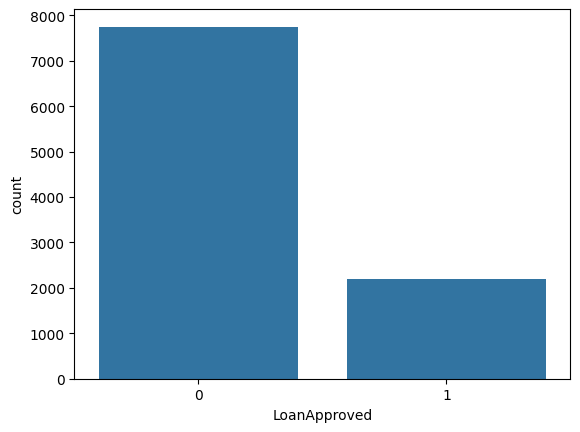

In [257]:
print(df['LoanApproved'].value_counts())
print()
print((df['LoanApproved'].value_counts() / df['LoanApproved'].value_counts().sum()) * 100)

sns.countplot(data=df, x='LoanApproved')
df.head()

### CART

In [258]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Splitting the dataset
attr = df_encoded.drop(columns = ['LoanApproved_1'])     # Features
target = df_encoded['LoanApproved_1']                    # Target Variable

# Splitting into 25% test, 75% training data
attr_train, attr_test, target_train, target_test = train_test_split(attr,
                                                                    target,
                                                                    test_size = 0.25,
                                                                    random_state = 3,
                                                                    shuffle = True)

model = DecisionTreeClassifier()

model.fit(attr_train,target_train)
target_pred = model.predict(attr_test)

print(f"Accuracy: {accuracy_score(target_test,target_pred)}")
print(f"\n Confusion Matrix:") 
print(confusion_matrix(target_test, target_pred))
print(f"\n Classification Report:")
print(classification_report(target_test, target_pred))

Accuracy: 0.9863234111021721

 Confusion Matrix:
[[1924   17]
 [  17  528]]

 Classification Report:
              precision    recall  f1-score   support

       False       0.99      0.99      0.99      1941
        True       0.97      0.97      0.97       545

    accuracy                           0.99      2486
   macro avg       0.98      0.98      0.98      2486
weighted avg       0.99      0.99      0.99      2486



In [259]:
# Splitting the dataset
attr = df_encoded.drop(columns = ['LoanApproved_1', 'RiskScore'])     # Features (without RiskScore)
target = df_encoded['LoanApproved_1']                                 # Target Variable

# Splitting into 25% test, 75% training data
attr_train, attr_test, target_train, target_test = train_test_split(attr,
                                                                    target,
                                                                    test_size = 0.25,
                                                                    random_state = 3,
                                                                    shuffle = True)

model = DecisionTreeClassifier()

model.fit(attr_train,target_train)
target_pred = model.predict(attr_test)

print(f"Accuracy: {accuracy_score(target_test, target_pred)}")
print(f"\n Confusion Matrix:") 
print(confusion_matrix(target_test, target_pred))
print(f"\n Classification Report:")
print(classification_report(target_test, target_pred))

Accuracy: 0.8793242156074015

 Confusion Matrix:
[[1793  148]
 [ 152  393]]

 Classification Report:
              precision    recall  f1-score   support

       False       0.92      0.92      0.92      1941
        True       0.73      0.72      0.72       545

    accuracy                           0.88      2486
   macro avg       0.82      0.82      0.82      2486
weighted avg       0.88      0.88      0.88      2486



In [260]:
# List of features extracted from the given data
selected_features = list(significant_features['Feature'])

# Filter the DataFrame to include only the selected features (based off p-value)
attr = df_encoded[selected_features]            # Features
target = df_encoded['LoanApproved_1']           # Target Variable

# Splitting into 25% test, 75% training data
attr_train, attr_test, target_train, target_test = train_test_split(attr,
                                                                    target,
                                                                    test_size = 0.25,
                                                                    random_state = 3,
                                                                    shuffle = True)

model = DecisionTreeClassifier()

model.fit(attr_train,target_train)
target_pred = model.predict(attr_test)

print(f"Accuracy: {accuracy_score(target_test, target_pred)}")
print(f"\n Confusion Matrix:") 
print(confusion_matrix(target_test, target_pred))
print(f"\n Classification Report:")
print(classification_report(target_test, target_pred))

Accuracy: 0.8045052292839904

 Confusion Matrix:
[[1679  262]
 [ 224  321]]

 Classification Report:
              precision    recall  f1-score   support

       False       0.88      0.87      0.87      1941
        True       0.55      0.59      0.57       545

    accuracy                           0.80      2486
   macro avg       0.72      0.73      0.72      2486
weighted avg       0.81      0.80      0.81      2486



### C5.0

In [261]:
# Splitting the dataset
attr = df_encoded.drop(columns = ['LoanApproved_1', 'RiskScore'])     # Features (without RiskScore)
target = df_encoded['LoanApproved_1']                                 # Target Variable

# Splitting into 25% test, 75% training data
attr_train, attr_test, target_train, target_test = train_test_split(attr,
                                                                    target,
                                                                    test_size = 0.25,
                                                                    random_state = 3,
                                                                    shuffle = True)

results = []

# Loop through values for max_depth and max_leaf_nodes
for max_depth in range(1, 11):
    for max_leaf_nodes in range(2, 11):
        model = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, max_leaf_nodes=max_leaf_nodes)
        
        model.fit(attr_train,target_train)
        target_pred = model.predict(attr_test)

        results.append({
            "max_depth": max_depth,
            "max_leaf_nodes": max_leaf_nodes,
            "accuracy": accuracy_score(target_test, target_pred)
        })

results_df = pd.DataFrame(results)
results_df.sort_values(by="accuracy", ascending=False)

max_depth  max_leaf_nodes  accuracy
89         10              10  0.871681
62          7              10  0.871681
35          4              10  0.871681
34          4               9  0.871681
43          5               9  0.871681
..        ...             ...       ...
5           1               7  0.808930
4           1               6  0.808930
3           1               5  0.808930
2           1               4  0.808930
45          6               2  0.808930

[90 rows x 3 columns]

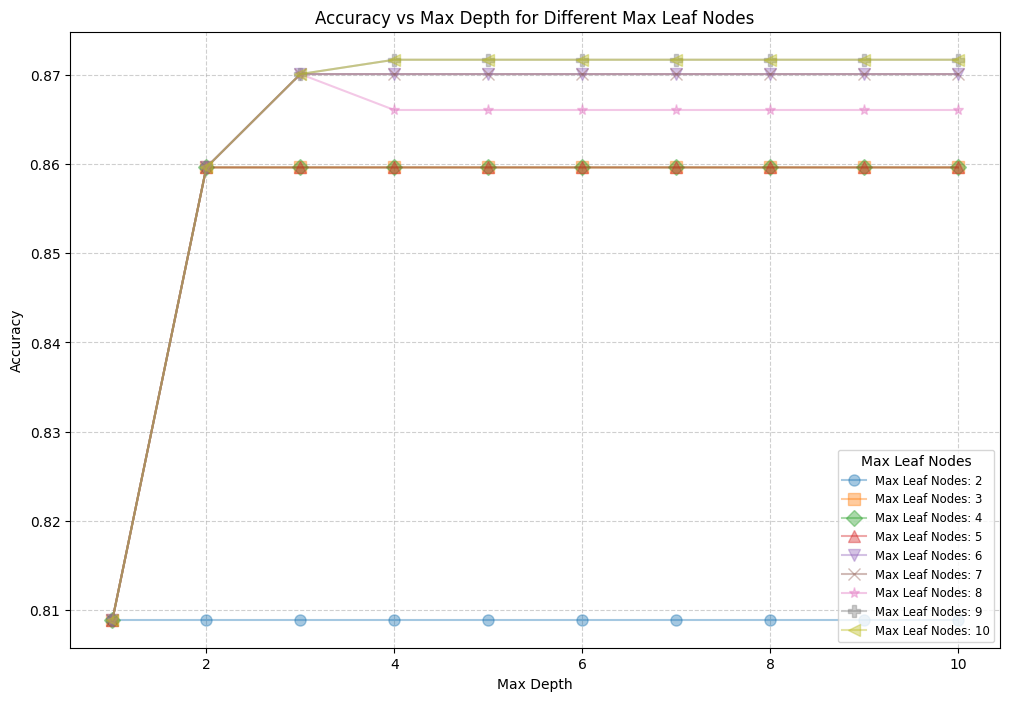

In [262]:
import matplotlib.pyplot as plt

# Define marker styles to differentiate each line
marker_styles = ['o', 's', 'D', '^', 'v', 'x', '*', 'P', '<', '>']

plt.figure(figsize=(12, 8))

# Loop through unique values of max_leaf_nodes
for idx, max_leaf_nodes in enumerate(results_df['max_leaf_nodes'].unique()):
    subset = results_df[results_df['max_leaf_nodes'] == max_leaf_nodes]
    plt.plot(
        subset['max_depth'], 
        subset['accuracy'], 
        marker=marker_styles[idx % len(marker_styles)],
        label=f"Max Leaf Nodes: {max_leaf_nodes}",
        alpha=0.4,
        linewidth=1.5,
        markersize=8
    )

# Add labels, title, legend, and grid
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max Depth for Different Max Leaf Nodes')
plt.legend(title="Max Leaf Nodes", loc='lower right', fontsize='small')  # Adjust legend size
plt.grid(True, linestyle='--', alpha=0.6)  # Lighter gridlines for better readability

# Show the plot
plt.show()

In [263]:
# Sort the DataFrame by accuracy (descending), then max_depth and max_leaf_nodes (ascending)
optimal_result = (
    results_df.sort_values(by=["accuracy", "max_depth", "max_leaf_nodes"], ascending=[False, True, True])
    .iloc[0]
)

# Display the result
print("Optimal Result:")
print(optimal_result)

Optimal Result:
max_depth         4.000000
max_leaf_nodes    9.000000
accuracy          0.871681
Name: 34, dtype: float64


In [264]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=4, max_leaf_nodes=9)

model.fit(attr_train,target_train)
target_pred = model.predict(attr_test)

print(f"Accuracy: {accuracy_score(target_test, target_pred)}")
print(f"\n Confusion Matrix:") 
print(confusion_matrix(target_test, target_pred))
print(f"\n Classification Report:")
print(classification_report(target_test, target_pred))

Accuracy: 0.8716814159292036

 Confusion Matrix:
[[1759  182]
 [ 137  408]]

 Classification Report:
              precision    recall  f1-score   support

       False       0.93      0.91      0.92      1941
        True       0.69      0.75      0.72       545

    accuracy                           0.87      2486
   macro avg       0.81      0.83      0.82      2486
weighted avg       0.88      0.87      0.87      2486



In [265]:
from sklearn.tree import plot_tree

plt.figure(figsize=(50,30), dpi=250)
plot_tree(model, fontsize=20, filled=True, feature_names=attr.columns)

[Text(0.5666666666666667, 0.9, 'TotalDebtToIncomeRatio <= 0.216\nentropy = 0.761\nsamples = 7455\nvalue = [5810, 1645]'),
 Text(0.26666666666666666, 0.7, 'InterestRate <= 0.227\nentropy = 0.994\nsamples = 2536\nvalue = [1151.0, 1385.0]'),
 Text(0.41666666666666663, 0.8, 'True  '),
 Text(0.13333333333333333, 0.5, 'MonthlyIncome <= 6346.292\nentropy = 0.797\nsamples = 1241\nvalue = [299, 942]'),
 Text(0.06666666666666667, 0.3, 'entropy = 0.964\nsamples = 630\nvalue = [245.0, 385.0]'),
 Text(0.2, 0.3, 'entropy = 0.431\nsamples = 611\nvalue = [54, 557]'),
 Text(0.4, 0.5, 'MonthlyIncome <= 7172.917\nentropy = 0.927\nsamples = 1295\nvalue = [852.0, 443.0]'),
 Text(0.3333333333333333, 0.3, 'entropy = 0.686\nsamples = 788\nvalue = [644, 144]'),
 Text(0.4666666666666667, 0.3, 'InterestRate <= 0.274\nentropy = 0.977\nsamples = 507\nvalue = [208, 299]'),
 Text(0.4, 0.1, 'entropy = 0.883\nsamples = 375\nvalue = [113, 262]'),
 Text(0.5333333333333333, 0.1, 'entropy = 0.856\nsamples = 132\nvalue = [

In [266]:
# List of features extracted from the given data
selected_features = list(significant_features['Feature'])

# Filter the DataFrame to include only the selected features (based off p-value)
attr = df_encoded[selected_features]            # Features
target = df_encoded['LoanApproved_1']           # Target Variable

# Splitting into 25% test, 75% training data
attr_train, attr_test, target_train, target_test = train_test_split(attr,
                                                                    target,
                                                                    test_size = 0.25,
                                                                    random_state = 3,
                                                                    shuffle = True)

results = []

# Loop through values for max_depth and max_leaf_nodes
for max_depth in range(1, 11):
    for max_leaf_nodes in range(2, 11):
        model = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, max_leaf_nodes=max_leaf_nodes)
        
        model.fit(attr_train,target_train)
        target_pred = model.predict(attr_test)

        results.append({
            "max_depth": max_depth,
            "max_leaf_nodes": max_leaf_nodes,
            "accuracy": accuracy_score(target_test, target_pred)
        })

results_df = pd.DataFrame(results)
results_df.sort_values(by="accuracy", ascending=False)

max_depth  max_leaf_nodes  accuracy
89         10              10  0.850764
53          6              10  0.850764
42          5               8  0.850764
43          5               9  0.850764
44          5              10  0.850764
..        ...             ...       ...
5           1               7  0.780772
4           1               6  0.780772
3           1               5  0.780772
2           1               4  0.780772
45          6               2  0.780772

[90 rows x 3 columns]

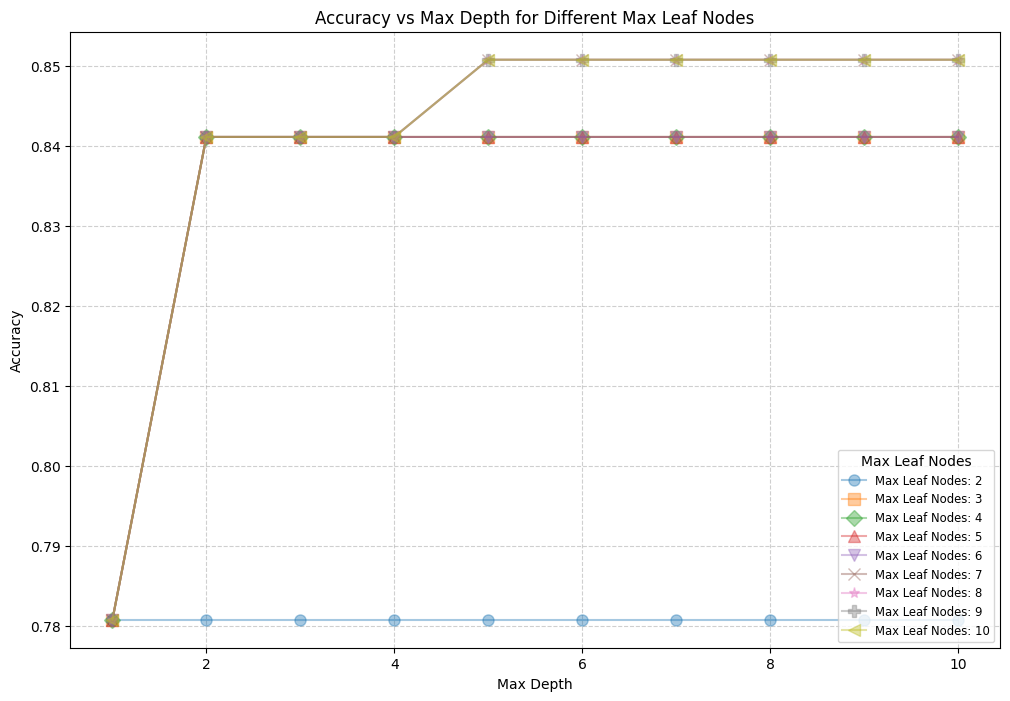

In [267]:
# Define marker styles to differentiate each line
marker_styles = ['o', 's', 'D', '^', 'v', 'x', '*', 'P', '<', '>']

plt.figure(figsize=(12, 8))

# Loop through unique values of max_leaf_nodes
for idx, max_leaf_nodes in enumerate(results_df['max_leaf_nodes'].unique()):
    subset = results_df[results_df['max_leaf_nodes'] == max_leaf_nodes]
    plt.plot(
        subset['max_depth'], 
        subset['accuracy'], 
        marker=marker_styles[idx % len(marker_styles)],
        label=f"Max Leaf Nodes: {max_leaf_nodes}",
        alpha=0.4,
        linewidth=1.5,
        markersize=8
    )

# Add labels, title, legend, and grid
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max Depth for Different Max Leaf Nodes')
plt.legend(title="Max Leaf Nodes", loc='lower right', fontsize='small')  # Adjust legend size
plt.grid(True, linestyle='--', alpha=0.6)  # Lighter gridlines for better readability

# Show the plot
plt.show()

In [268]:
# Sort the DataFrame by accuracy (descending), then max_depth and max_leaf_nodes (ascending)
optimal_result = (
    results_df.sort_values(by=["accuracy", "max_depth", "max_leaf_nodes"], ascending=[False, True, True])
    .iloc[0]
)

# Display the result
print("Optimal Result:")
print(optimal_result)

Optimal Result:
max_depth         5.000000
max_leaf_nodes    7.000000
accuracy          0.850764
Name: 41, dtype: float64


In [269]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=5, max_leaf_nodes=7)

model.fit(attr_train,target_train)
target_pred = model.predict(attr_test)

print(f"Accuracy: {accuracy_score(target_test, target_pred)}")
print(f"\n Confusion Matrix:") 
print(confusion_matrix(target_test, target_pred))
print(f"\n Classification Report:")
print(classification_report(target_test, target_pred))

Accuracy: 0.8507642799678198

 Confusion Matrix:
[[1759  182]
 [ 189  356]]

 Classification Report:
              precision    recall  f1-score   support

       False       0.90      0.91      0.90      1941
        True       0.66      0.65      0.66       545

    accuracy                           0.85      2486
   macro avg       0.78      0.78      0.78      2486
weighted avg       0.85      0.85      0.85      2486



In [270]:
plt.figure(figsize=(50,30), dpi=250)
plot_tree(model, fontsize=20, filled=True, feature_names=attr.columns)

[Text(0.5, 0.9166666666666666, 'MonthlyIncome <= 4501.333\nentropy = 0.761\nsamples = 7455\nvalue = [5810, 1645]'),
 Text(0.25, 0.75, 'MonthlyIncome <= 3123.208\nentropy = 0.273\nsamples = 4425\nvalue = [4218, 207]'),
 Text(0.375, 0.8333333333333333, 'True  '),
 Text(0.125, 0.5833333333333334, 'entropy = 0.095\nsamples = 2557\nvalue = [2526, 31]'),
 Text(0.375, 0.5833333333333334, 'entropy = 0.45\nsamples = 1868\nvalue = [1692, 176]'),
 Text(0.75, 0.75, 'MonthlyIncome <= 7432.875\nentropy = 0.998\nsamples = 3030\nvalue = [1592, 1438]'),
 Text(0.625, 0.8333333333333333, '  False'),
 Text(0.625, 0.5833333333333334, 'LoanDuration <= 78.0\nentropy = 0.938\nsamples = 2077\nvalue = [1341, 736]'),
 Text(0.5, 0.4166666666666667, 'LengthOfCreditHistory <= 11.5\nentropy = 0.968\nsamples = 1742\nvalue = [1055, 687]'),
 Text(0.375, 0.25, 'entropy = 0.835\nsamples = 644\nvalue = [473.0, 171.0]'),
 Text(0.625, 0.25, 'AnnualIncome <= 64149.0\nentropy = 0.997\nsamples = 1098\nvalue = [582, 516]'),
 Te

### Random Forest

In [271]:
# Splitting the dataset
attr = df_encoded.drop(columns = ['LoanApproved_1', 'RiskScore'])     # Features (without RiskScore)
target = df_encoded['LoanApproved_1']                                 # Target Variable

# Splitting into 25% test, 75% training data
attr_train, attr_test, target_train, target_test = train_test_split(attr,
                                                                    target,
                                                                    test_size = 0.25,
                                                                    random_state = 3,
                                                                    shuffle = True)


results = []
n_estimators = [10, 50, 100, 200, 500]

# Loop through values for n_estimators
for n in n_estimators:
    model = RandomForestClassifier(n_estimators=n, random_state=7)
    
    model.fit(attr_train,target_train)
    target_pred = model.predict(attr_test)

    results.append({
        "n_estimators": n,
        "accuracy": accuracy_score(target_test, target_pred)
    })

results_df = pd.DataFrame(results)
results_df.sort_values(by="accuracy", ascending=False)

n_estimators  accuracy
1            50  0.919952
3           200  0.917136
2           100  0.916331
4           500  0.916331
0            10  0.901046

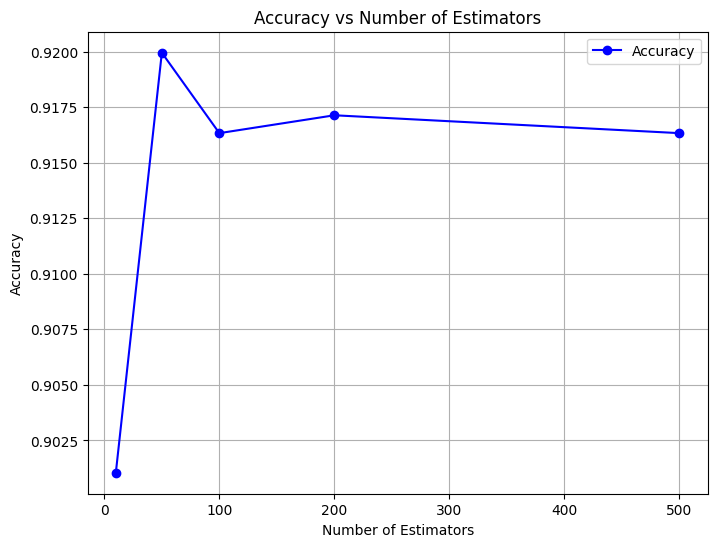

In [272]:
plt.figure(figsize=(8, 6))
plt.plot(results_df['n_estimators'], results_df['accuracy'], marker='o', linestyle='-', color='b', label='Accuracy')

# Adding labels and title
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Estimators')

# Display grid
plt.grid(True)

# Show the plot
plt.legend()
plt.show()

In [273]:
model = RandomForestClassifier(n_estimators=50, random_state=7)
    
model.fit(attr_train, target_train)
target_pred = model.predict(attr_test)

print(f"Accuracy: {accuracy_score(target_test, target_pred)}")
print(f"\n Confusion Matrix:") 
print(confusion_matrix(target_test, target_pred))
print(f"\n Classification Report:")
print(classification_report(target_test, target_pred))

Accuracy: 0.919951729686243

 Confusion Matrix:
[[1894   47]
 [ 152  393]]

 Classification Report:
              precision    recall  f1-score   support

       False       0.93      0.98      0.95      1941
        True       0.89      0.72      0.80       545

    accuracy                           0.92      2486
   macro avg       0.91      0.85      0.87      2486
weighted avg       0.92      0.92      0.92      2486



In [274]:
# Feature importance for Mean Decrease Accuracy
mean_decrease_accuracy = model.feature_importances_
print(f"Mean Decrease Accuracy: {mean_decrease_accuracy}")

# Feature importance for Mean Decrease GINI
gini_importance = model.feature_importances_ * model.estimators_[0].tree_.impurity[0]
print(f"\nMean Decrease GINI: {gini_importance}")

Mean Decrease Accuracy: [1.70727914e-02 1.40078923e-01 2.16115518e-02 1.54672833e-02
 3.63872402e-02 2.03617580e-02 7.13374875e-03 1.96530270e-02
 1.58869429e-02 8.97128729e-03 5.73202622e-03 1.61135216e-02
 0.00000000e+00 2.72559038e-02 1.51932604e-02 1.50143210e-02
 2.00581590e-02 1.63300465e-02 1.25749940e-01 9.79513266e-03
 2.28628443e-02 4.00016287e-02 9.04042514e-02 3.03279553e-02
 1.85715876e-01 1.77305641e-03 2.00906247e-03 2.71112167e-03
 3.64946010e-03 6.15969871e-03 4.37979203e-03 2.47898103e-03
 2.72299074e-03 9.28318082e-04 2.21315417e-03 2.23533383e-03
 3.06309516e-03 6.21550233e-03 2.30604433e-03 2.24794990e-03
 2.70070222e-03 1.50910344e-03 3.64279330e-05 4.70065261e-06
 2.39811223e-04 2.72894089e-04 3.18944558e-04 5.82129276e-04
 5.67862871e-04 6.80595783e-04 1.17758892e-03 1.18952423e-03
 1.53179035e-03 1.41377537e-03 1.36975677e-03 1.60316511e-03
 1.54499407e-03 1.95549920e-03 1.87566735e-03 1.66026976e-03
 1.95425398e-03 1.35941414e-03 1.31080299e-03 1.38987350e-03


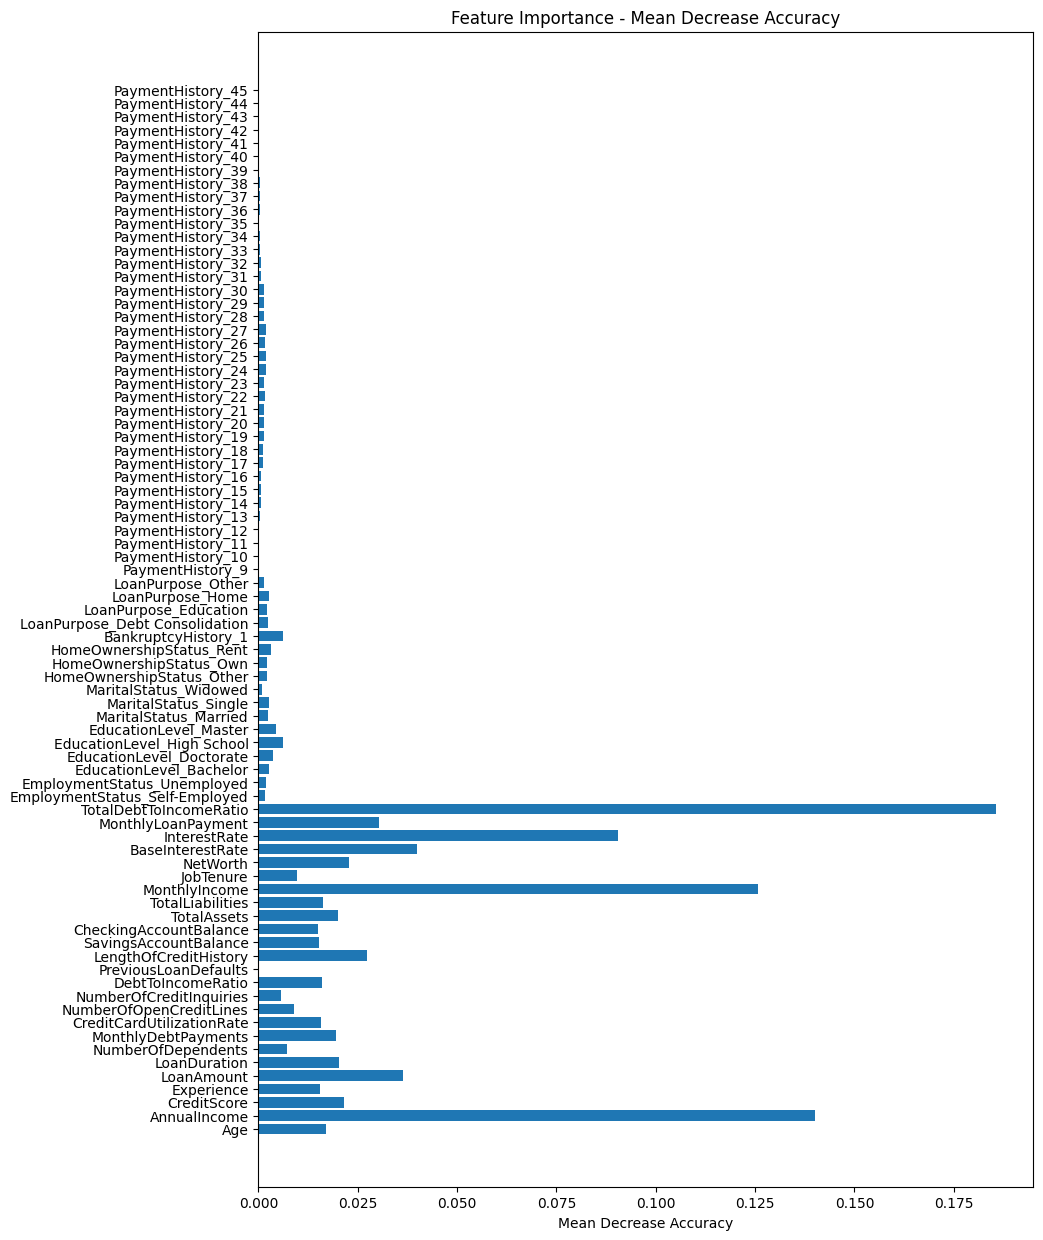

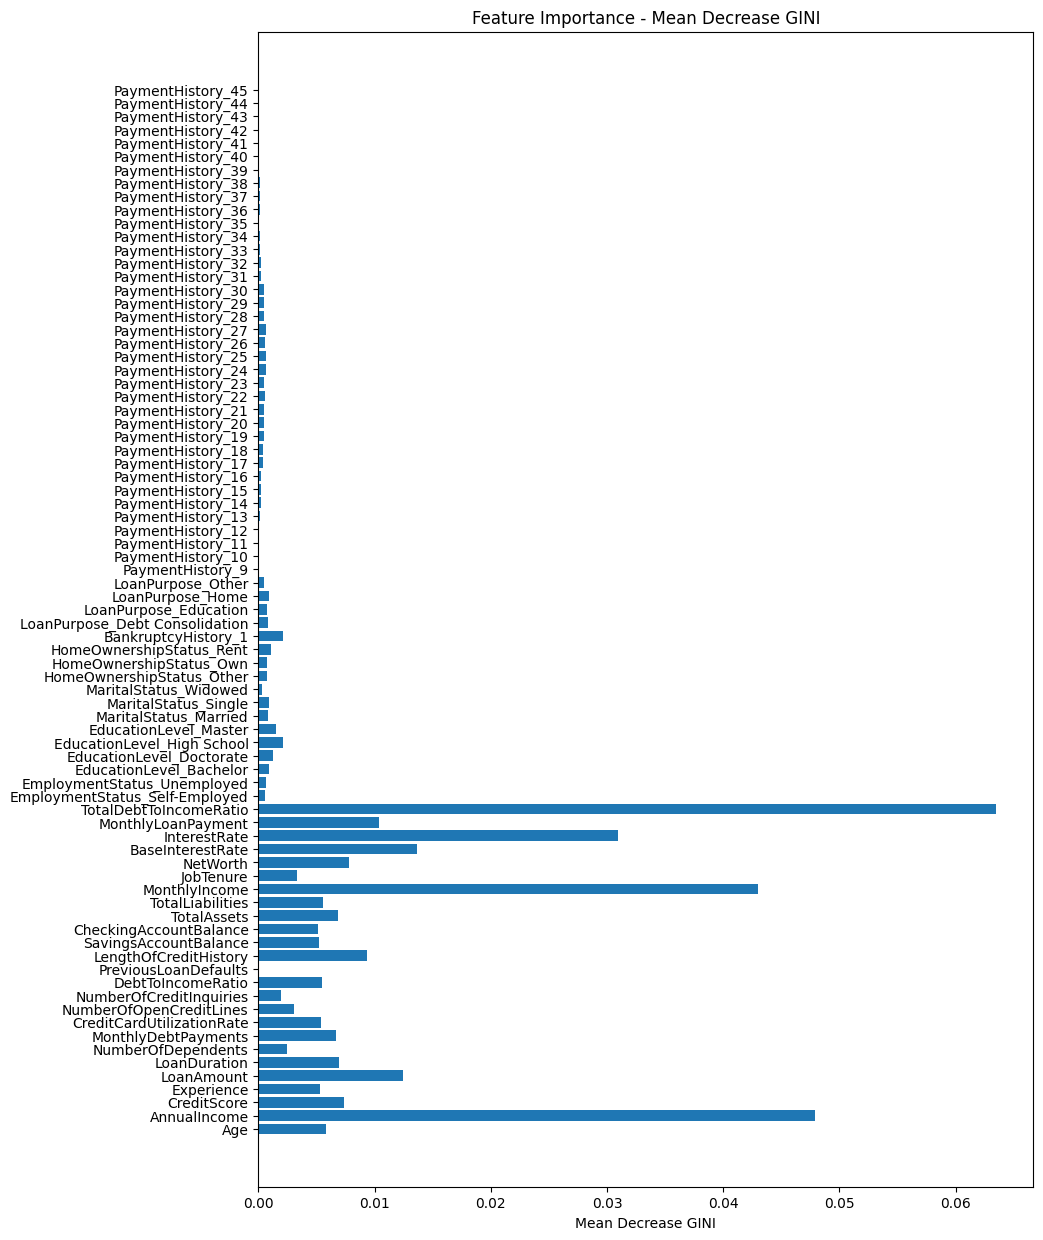

In [275]:
plt.figure(figsize=(10, 15))
plt.barh(range(len(mean_decrease_accuracy)), mean_decrease_accuracy, align='center')
plt.yticks(range(len(mean_decrease_accuracy)), attr.columns)
plt.xlabel('Mean Decrease Accuracy')
plt.title('Feature Importance - Mean Decrease Accuracy')
plt.show()
plt.figure(figsize=(10, 15))
plt.barh(range(len(gini_importance)), gini_importance, align='center')
plt.yticks(range(len(gini_importance)), attr.columns)
plt.xlabel('Mean Decrease GINI')
plt.title('Feature Importance - Mean Decrease GINI')
plt.show()

In [276]:
# List of features extracted from the given data
selected_features = list(significant_features['Feature'])

# Filter the DataFrame to include only the selected features (based off p-value)
attr = df_encoded[selected_features]            # Features
target = df_encoded['LoanApproved_1']           # Target Variable

# Splitting into 25% test, 75% training data
attr_train, attr_test, target_train, target_test = train_test_split(attr,
                                                                    target,
                                                                    test_size = 0.25,
                                                                    random_state = 3,
                                                                    shuffle = True)

results = []
n_estimators = [10, 50, 100, 200, 500]

# Loop through values for n_estimators
for n in n_estimators:
    model = RandomForestClassifier(n_estimators=n, random_state=7)
    
    model.fit(attr_train, target_train)
    target_pred = model.predict(attr_test)

    results.append({
        "n_estimators": n,
        "accuracy": accuracy_score(target_test, target_pred)
    })

results_df = pd.DataFrame(results)
results_df.sort_values(by="accuracy", ascending=False)

n_estimators  accuracy
2           100  0.860821
3           200  0.860821
4           500  0.858005
1            50  0.855591
0            10  0.850764

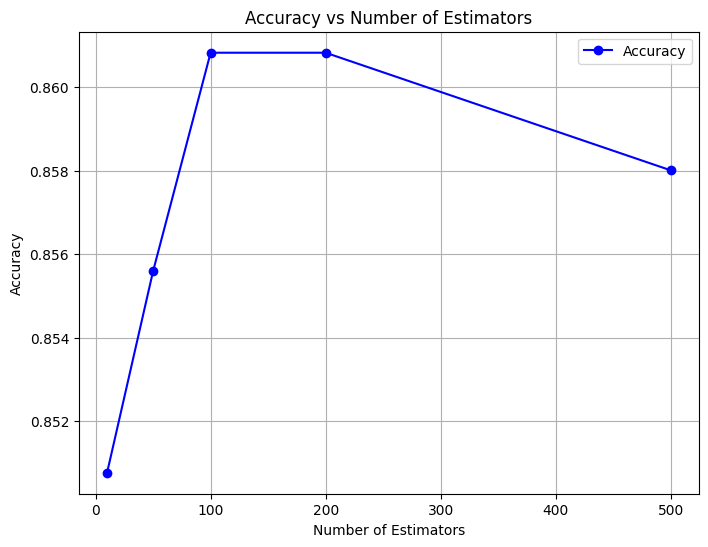

In [277]:
plt.figure(figsize=(8, 6))
plt.plot(results_df['n_estimators'], results_df['accuracy'], marker='o', linestyle='-', color='b', label='Accuracy')

# Adding labels and title
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Estimators')

# Display grid
plt.grid(True)

# Show the plot
plt.legend()
plt.show()

In [278]:
model = RandomForestClassifier(n_estimators=50, random_state=7)
    
model.fit(attr_train, target_train)
target_pred = model.predict(attr_test)

print(f"Accuracy: {accuracy_score(target_test, target_pred)}")
print(f"\n Confusion Matrix:") 
print(confusion_matrix(target_test, target_pred))
print(f"\n Classification Report:")
print(classification_report(target_test, target_pred))

Accuracy: 0.8555913113435237

 Confusion Matrix:
[[1818  123]
 [ 236  309]]

 Classification Report:
              precision    recall  f1-score   support

       False       0.89      0.94      0.91      1941
        True       0.72      0.57      0.63       545

    accuracy                           0.86      2486
   macro avg       0.80      0.75      0.77      2486
weighted avg       0.85      0.86      0.85      2486



In [279]:
# Feature importance for Mean Decrease Accuracy
mean_decrease_accuracy = model.feature_importances_
print(f"Mean Decrease Accuracy: {mean_decrease_accuracy}")

# Feature importance for Mean Decrease GINI
gini_importance = model.feature_importances_ * model.estimators_[0].tree_.impurity[0]
print(f"\nMean Decrease GINI: {gini_importance}")

Mean Decrease Accuracy: [0.06793031 0.25543977 0.08563652 0.0682671  0.05879398 0.08166718
 0.25172868 0.00744621 0.00741076 0.01066451 0.00904758 0.01422095
 0.01137844 0.00874972 0.01261138 0.01008079 0.01029188 0.00802505
 0.00386742 0.00743977 0.00710314 0.00219886]

Mean Decrease GINI: [0.02323086 0.08735548 0.02928604 0.02334603 0.02010641 0.0279286
 0.08608636 0.00254646 0.00253434 0.00364706 0.0030941  0.00486329
 0.00389121 0.00299223 0.00431285 0.00344744 0.00351962 0.00274441
 0.00132258 0.00254426 0.00242914 0.00075197]


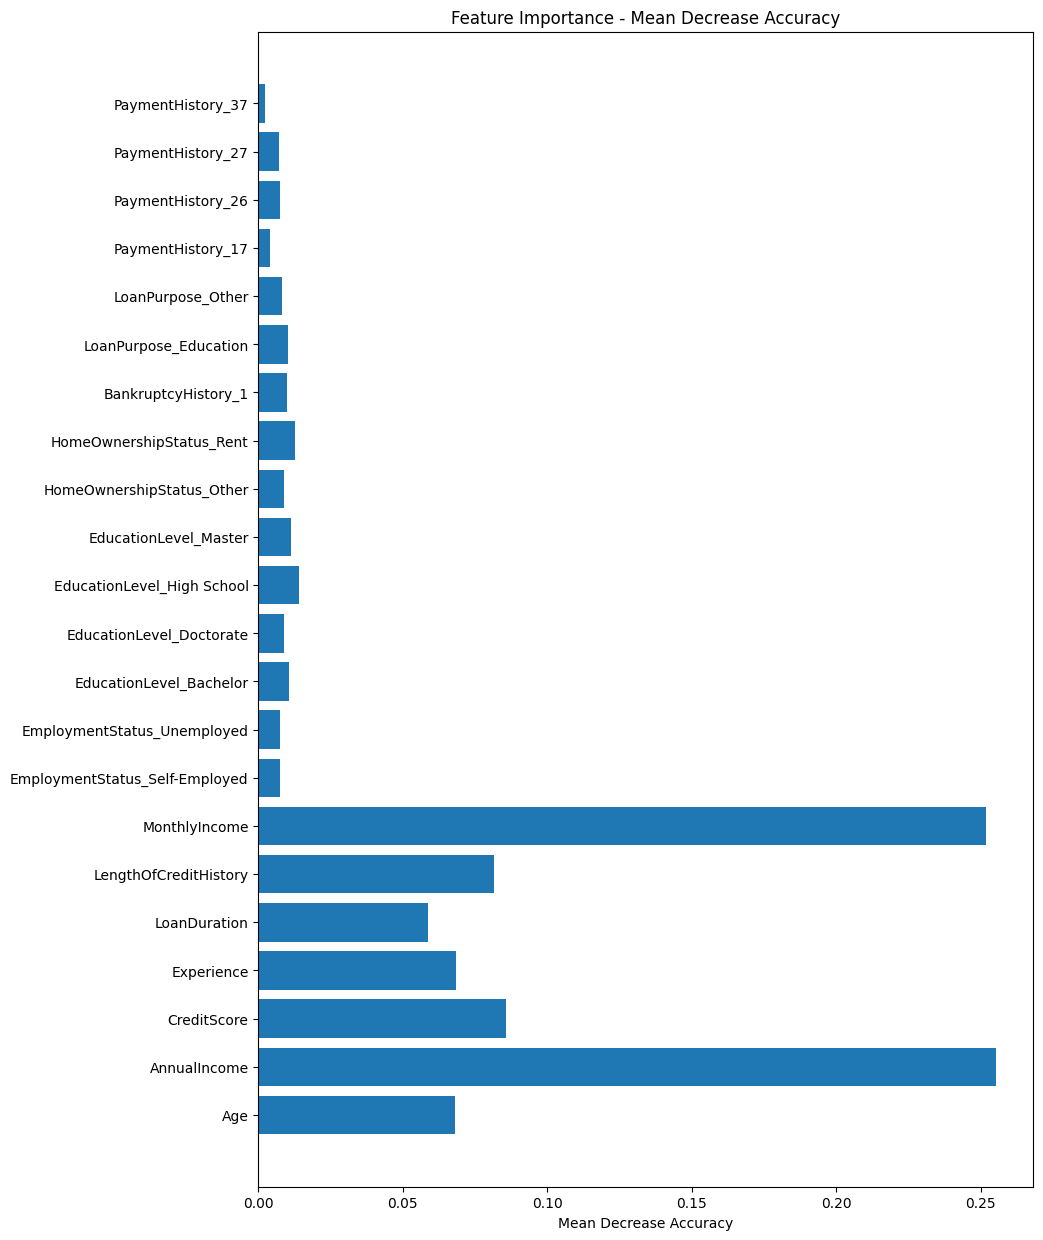

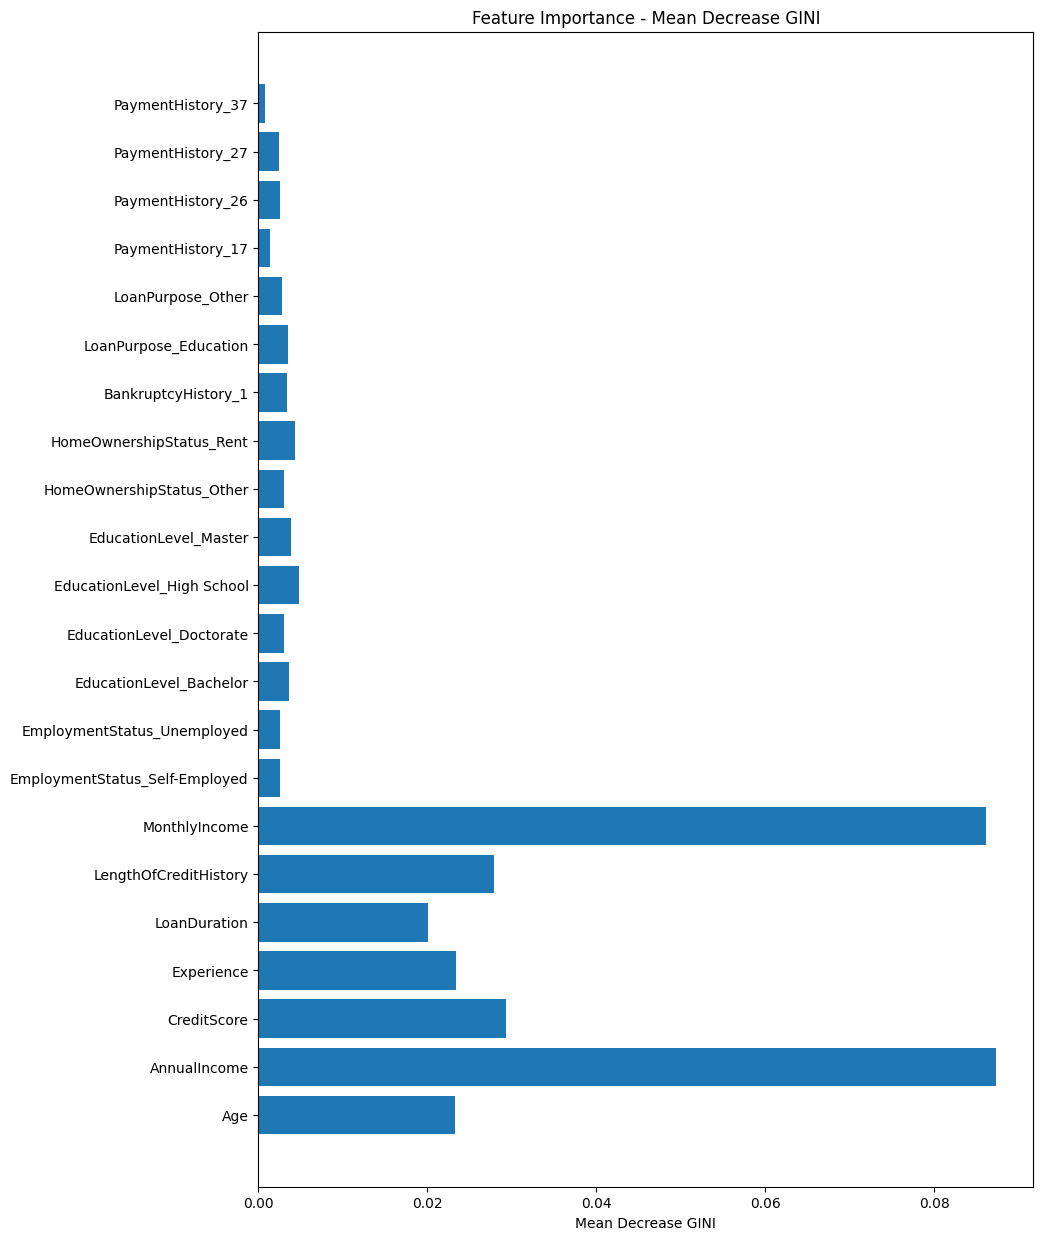

In [280]:
plt.figure(figsize=(10, 15))
plt.barh(range(len(mean_decrease_accuracy)), mean_decrease_accuracy, align='center')
plt.yticks(range(len(mean_decrease_accuracy)), attr.columns)
plt.xlabel('Mean Decrease Accuracy')
plt.title('Feature Importance - Mean Decrease Accuracy')
plt.show()
plt.figure(figsize=(10, 15))
plt.barh(range(len(gini_importance)), gini_importance, align='center')
plt.yticks(range(len(gini_importance)), attr.columns)
plt.xlabel('Mean Decrease GINI')
plt.title('Feature Importance - Mean Decrease GINI')
plt.show()